In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define the data directory
data_dir = 'C:\\Users\\Roni Paul\\Desktop\\Python Projects (ML)\\Major Project (Diploma, 6th Sem)\\Mango Classification\\Dataset\\Classification_dataset'
classes = os.listdir(data_dir)

# Load and preprocess the images
X = []
y = []

for label in classes:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file)
        try:
            image = Image.open(file_path).convert('RGB')
            image = image.resize((64, 64))  # Resize all images to a fixed size
            X.append(np.array(image))
            y.append(label)
        except Exception as e:
            print(f'Error loading image {file_path}: {e}')

X = np.array(X)
y = np.array(y)

# Flatten the images for Random Forest input
X = X.reshape(X.shape[0], -1)

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [2]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

# Define a more extensive parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

# Measure the time taken to fit the Randomized Search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')
print(f'Time taken: {end_time - start_time:.2f} seconds')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Python_312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
117 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python_312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python_312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python_312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python_312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in vali

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
Best Cross-Validation Score: 0.9892833077661969
Time taken: 122.46 seconds


In [4]:
from sklearn.metrics import accuracy_score, log_loss, classification_report

# Use the best model from Randomized Search
best_rf = random_search.best_estimator_

# Evaluate on the validation set
val_preds = best_rf.predict(X_val)
val_proba = best_rf.predict_proba(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_loss = log_loss(y_val, val_proba)

print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Validation Loss: {val_loss * 100:.2f}%\n')

# Evaluate on the test set
test_preds = best_rf.predict(X_test)
test_proba = best_rf.predict_proba(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_loss = log_loss(y_test, test_proba)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

Validation Accuracy: 98.33%
Validation Loss: 17.44%

Test Accuracy: 100.00%
Test Loss: 16.96%


Classification Report:
                           precision    recall  f1-score   support

            Anwar_Ratool       1.00      1.00      1.00        24
         Chaunsa (Black)       1.00      1.00      1.00        40
Chaunsa (Summer Bahisht)       1.00      1.00      1.00        32
         Chaunsa (White)       1.00      1.00      1.00        27
                 Dosehri       1.00      1.00      1.00        25
                   Fajri       1.00      1.00      1.00        26
                  Langra       1.00      1.00      1.00        34
                 Sindhri       1.00      1.00      1.00        32

                accuracy                           1.00       240
               macro avg       1.00      1.00      1.00       240
            weighted avg       1.00      1.00      1.00       240



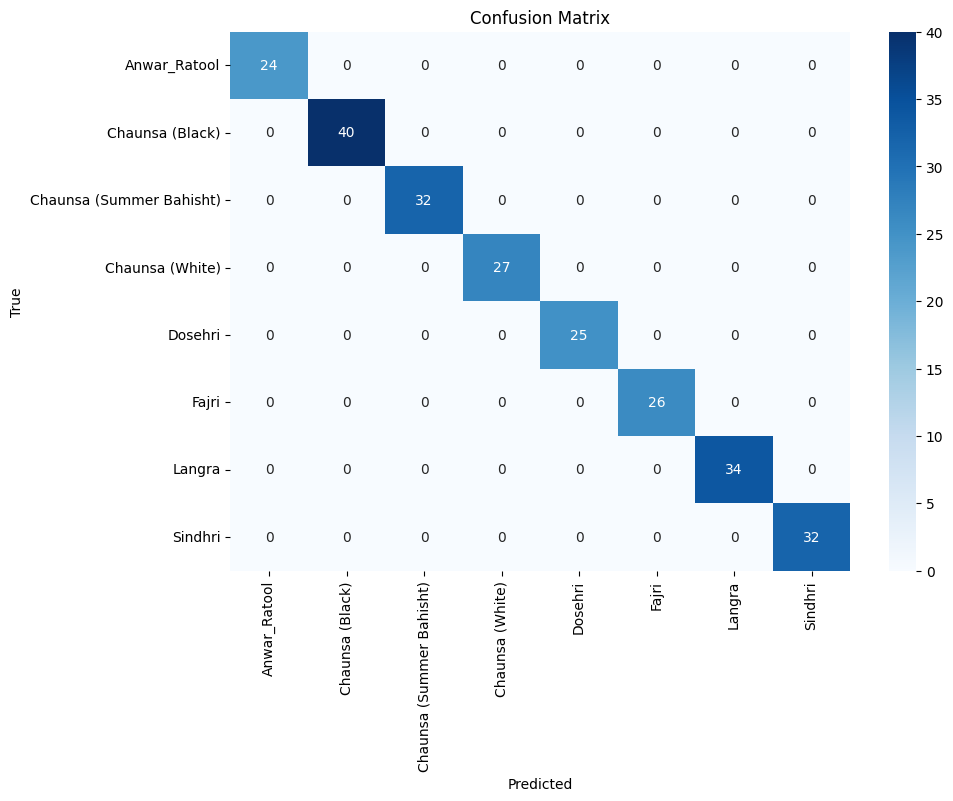

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print("Classification Report:\n", classification_report(y_test, test_preds, target_names=le.classes_))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

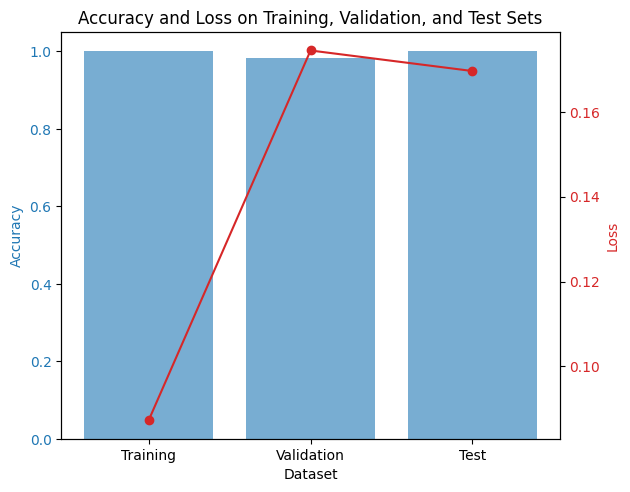

In [6]:
# Plot accuracy and loss
train_preds = best_rf.predict(X_train)
train_proba = best_rf.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
train_loss = log_loss(y_train, train_proba)

labels = ['Training', 'Validation', 'Test']
accuracies = [train_accuracy, val_accuracy, test_accuracy]
losses = [train_loss, val_loss, test_loss]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(labels, accuracies, color=color, alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(labels, losses, color=color, marker='o', label='Loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Accuracy and Loss on Training, Validation, and Test Sets')
plt.show()